# Imputer from Scratch

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries</a></span></li><li><span><a href="#Strategy-Interface" data-toc-modified-id="Strategy-Interface-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strategy Interface</a></span></li><li><span><a href="#Family-of-algorithms" data-toc-modified-id="Family-of-algorithms-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Family of algorithms</a></span><ul class="toc-item"><li><span><a href="#Concrete-Strategy-1" data-toc-modified-id="Concrete-Strategy-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Concrete Strategy 1</a></span></li><li><span><a href="#Concrete-Strategy-2" data-toc-modified-id="Concrete-Strategy-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Concrete Strategy 2</a></span></li><li><span><a href="#Concrete-Strategy-3" data-toc-modified-id="Concrete-Strategy-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Concrete Strategy 3</a></span></li><li><span><a href="#Concrete-strategy-instantiation" data-toc-modified-id="Concrete-strategy-instantiation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Concrete strategy instantiation</a></span></li></ul></li><li><span><a href="#The-Context" data-toc-modified-id="The-Context-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Context</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Using-the-Imputer" data-toc-modified-id="Using-the-Imputer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using the Imputer</a></span><ul class="toc-item"><li><span><a href="#Imputed-by-Mean" data-toc-modified-id="Imputed-by-Mean-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Imputed by Mean</a></span></li><li><span><a href="#Imputed-by-Mean---Transposed" data-toc-modified-id="Imputed-by-Mean---Transposed-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Imputed by Mean - Transposed</a></span></li><li><span><a href="#Imputed-by-Median" data-toc-modified-id="Imputed-by-Median-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Imputed by Median</a></span></li></ul></li><li><span><a href="#Extending-the-Imputer" data-toc-modified-id="Extending-the-Imputer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Extending the Imputer</a></span><ul class="toc-item"><li><span><a href="#Imputed-by-Mode" data-toc-modified-id="Imputed-by-Mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Imputed by Mode</a></span></li></ul></li></ul></div>

# Assumptions
The main focus of this report on laboratory work is demonstrating the understanding of object-oriented programming principles and how to apply them.

Every step of the implementation is explained; it is therefore assumed that additional code documentation is redundant. However, to demonstrate an understanding of the documentation conventions described in PEP 257, examples are included in the class **Imputer**.

Since the code is made for demonstration purposes and not intended for reuse, error handling is also reduced to two examples of raising errors in the class **Imputer**.

# Implementation
The Imputer will be implementing the strategy pattern for its choices of imputation, which enables the algorithm used to vary independently at runtime. Thereby applying **Design Principle 1:** *Identify the aspects of your application that vary and separate them from what stays the same.*

## Importing libraries

Importing a metaclass for defining abstract base classes, and a decorator indicating abstract methods from the abc module.

In [1]:
from abc import ABCMeta, abstractmethod

Importing deepcopy to enable making unique copies of compound objects.

In [2]:
from copy import deepcopy

## Strategy Interface
Firstly the strategy interface is defined.

The ImputationStrategy class is the superclass all composite classes inherit from and defines an interface with a default set of behaviours equal to all concrete strategies. Thereby applying **Design Principle 2:** *Program to an interface, not an implementation*, as well as **Design Principle 3:** *Favor composition over inheritance.*

In [3]:
class ImputationStrategy(metaclass=ABCMeta):

    @abstractmethod
    def _imputation(self, my_list: list, missing_values: str) -> float:
        """Must be implemented in order to instanciate"""

## Family of algorithms
Secondly, defining the concrete strategies. A family of algorithms is encapsulated in separate classes and made interchangeable through having the same interface.

Each family member can define new behaviors; however, they inherit all the superclass' behaviors, which can be replaced by overriding them.  Defining abstractmethods in the superclass demands any subclass to implement the specific behavior, thereby enforcing a common default interface.

Since these classes only have one single responsibility **Design Principle 6:** *A class should have only one reason to change.* is applied.

### Concrete Strategy 1
**Impute by mean**<br/>
Mean is the average sum of a group of numbers.

In [4]:
class ImputeByMean(ImputationStrategy):

    def _imputation(self, my_list: list, missing_values: str) -> float:
        temp_sum = 0
        count = 0
        for num in my_list:
            if num != missing_values:
                temp_sum += num
                count += 1
        mean = (temp_sum/count)
        return round(mean, 2)

### Concrete Strategy 2
**Impute by median**<br/>
Median is the middle of a *sorted* list of numbers.

In [5]:
class ImputeByMedian(ImputationStrategy):

    def _imputation(self, my_list: list, missing_values: str) -> float:
        temp_list = []
        for num in my_list:
            if num != missing_values:
                temp_list.append(num)

        temp_list.sort()
        temp_len = len(temp_list)

        if temp_len % 2 == 0:
            median1 = temp_list[temp_len//2]
            median2 = temp_list[temp_len//2 - 1]
            median = (median1 + median2)/2
        else:
            median = temp_list[temp_len//2]
        return round(median, 2)

### Concrete Strategy 3
**Impute by mode**<br/>
Mode is the most frequent value.

**Note:** Mode is included here for context but implemented below for demonstration purposes.
```python
class ImputeByMode(ImputationStrategy):

    def _imputation(self, my_list: list, missing_values: str) -> float:
        frequency = {}
        for item in my_list:
            if item != missing_values:
                if (item in frequency):
                    frequency[item] += 1
                else:
                    frequency[item] = 1
        mode = max(frequency, key=frequency.get)
        return round(mode, 2)
```

### Concrete strategy instantiation
By instantiating the class and referencing the object instance, only one object needs creation. Thereby applying **Design Principle 5:** *Depend upon abstractions. Do not depend upon concrete classes.* 

If instead directly calling the class, new objects are getting defined on each occasion.

In [6]:
mean = ImputeByMean()
median = ImputeByMedian()
# mode = ImputeByMode()

## The Context
The Imputer, which is the strategy patterns context, contains a reference to the instantiations of the concrete strategy objects.

The imputer uses the strategy interface to call the algorithm defined by a concrete strategy; each concrete strategy then implements an algorithm.<br/>
Since this is the only connection between the imputer and the strategy interface **Design Principle 4:** *Strive for loosely coupled designs between objects that interact"*, is applied.

When an operation is required, the concrete strategy object runs the algorithm without the imputer being aware of the strategy implementation.

If necessary, additional imputer objects can be instantiated to pass data from the imputer object to the strategy interface, thereby eliminating it as a singleton candidate.

In [7]:
class Imputer:
    """
     The base class for imputer objects.
     Enables the user to specify which imputation method, and which "cells" to 
     perform imputation on in a specific 2-dimensional list. 
     A unique copy is made of the specified 2-dimensional list before
     transforming and returning it to the user.
    """

    def __init__(self, strategy="mean", axis=0) -> None:
        """
        Defining instanse attributes on instansiation.

        Args:
            strategy (str, optional): A concrete strategy. Defaults to "mean".
            axis (int, optional): Column=0 or Row=1. Defaults to 0.
        """

        # Reference to the concrete strategy object being used.
        self._strategy = strategy
        # Calling internal method.
        self.__strategy_prosessor()
        # Reference to the axis orientation being used.
        self._axis = axis
        # Reference to the keyword for missing values.
        # Defined as public, as per convention.
        self.missing_values = "nan"
        # Defines which column or row to start.
        self._from_item = None
        # Defines which column or row to end.
        self._to_item = None

    def __strategy_prosessor(self) -> None:
        """
        Internal method validating that selected strategy is allowed.
        If so, selecting its imputation method.

        Raises:
            AssertionError: If the selected strategy is not allowed.
        """

        allowed_strategies = ["mean", "median", "mode"]
        if self._strategy == allowed_strategies[0]:
            self._strategy = mean._imputation
        elif self._strategy == allowed_strategies[1]:
            self._strategy = median._imputation
        elif self._strategy == allowed_strategies[2]:
            self._strategy = mode._imputation
        else:
            assert self._strategy in allowed_strategies, (
                f"Can only use these strategies: {allowed_strategies}, "
                f"got strategy = {self._strategy}")

    def __transpose(self, my_matrix: list) -> list:
        """
        Transposes 2-dimensional list.

        Args:
            my_matrix (list): 2-dimensional list.

        Returns:
            list: 2-dimensional list transposed.
        """

        trans_matrix = []
        temp_matrix = [[my_matrix[j][i] for j in range(len(my_matrix))]
                       for i in range(len(my_matrix[0]))]
        for row in temp_matrix:
            trans_matrix.append(row)
        return trans_matrix

    def fit(self, my_matrix: list, from_item: int, to_item: int) -> object:
        """
        Passes in the 2-dimensional list for imputation, 
        and sets from which column to start with, and end by.

        Args:
            my_matrix (list): 2-dimensional list.
            from_item (int): The column to start with.
            to_item (int): The column to end by.

        Raises:
            ValueError: If axis is not equal to the defined options.

        Returns:
            object: The same imputer object that calls the method.
        """
        
        self._to_item = to_item
        
        if self._axis == 0:
            self._array = my_matrix
            self._from_item = from_item - 1
        elif self._axis == 1:
            self._array = self.__transpose(my_matrix)
            self._from_item = from_item
        else:
            raise ValueError(
                f"Can only use integer value 0 or 1: "
                f"got axis = {self._axis}")
        return self

    def __axis_lister(self, matrix: list, col: int) -> list:
        """
        Generates a list for all values in a 2-dimensional list column.

        Args:
            matrix (list): 2-dimensional list.
            col (int): selected column to generat list from.

        Returns:
            list: All values in a 2-dimensional list column.
        """

        temp_list = []
        for row in range(len(matrix)):
            temp_list.append((matrix[row][col]))
        return temp_list

    def _imputation(self, my_list: list, missing_values: str) -> float:
        """
        Passing a list to the concrete strategy object with the desired
        imputation algorithm. For this reason, the method cannot be private, 
        but have to be public or protected.

        Args:
            my_list (list): The list to be calculated by the algorithm.
            missing_values (str): The keyword for the missing values.

        Returns:
            float: The calculated value to swap with the missing value keyword
        """

        return_value = self._strategy(my_list, missing_values)
        return return_value

    def transform(self) -> list:
        """
        Inserts the imputed column value in each column-row ("cell") of the 
        2-dimensional list where the missing value keyword exists.

        Returns:
            list: A unique copy of the selected 2-dimensional list after 
            it has been imputed.
        """

        return_matrix = deepcopy(self._array)
        for col in range(self._from_item, self._to_item):
            imputed_value = self._imputation(
                self.__axis_lister(self._array, col), self.missing_values)
            for row in range(len(return_matrix)):
                if return_matrix[row][col] == self.missing_values:
                    return_matrix[row][col] = imputed_value
        if self._axis == 0:
            pass
        elif self._axis == 1:
            return_matrix = self.__transpose(return_matrix)

        return return_matrix

    def __str__(self) -> str:
        """
        Provides users with an easy to read representation of the class.

        Returns:
            str: The class name.
        """

        return f"{self.__class__.__name__}"

    def __repr__(self) -> str:
        """
        Provides developers with unambigous information of the class.

        Returns:
            str: The class name and the state of instance variables.
        """
        return "{self.__class__.__name__}" \
               "(Strategy: {self._strategy}, " \
               "Axis:{self._axis}, " \
               "Missing value: {self.missing_values}, " \
               "From:{self._from_item}, " \
               "To:{self._to_item})".format(self=self)

# Demonstration
## Data Preprocessing
A class with a method for transposing a 2-dimensional list and a method to print this list format with tabs based on word length is made an instantiated.

In [8]:
class Matrix:
    def transpose(self, my_matrix):
        trans_matrix = []
        temp_matrix = [[my_matrix[j][i] for j in range(len(my_matrix))]
                       for i in range(len(my_matrix[0]))]
        for row in temp_matrix:
            trans_matrix.append(row)
        return trans_matrix

    def printer(self, my_matrix, title=None, axis=0):
        my_matrix = deepcopy(my_matrix)
        if title is not None:
            if axis == 0:
                my_matrix.insert(0, title)
            elif axis == 1:
                for i in range(len(my_matrix)):
                    my_matrix[i].insert(0, title[i])
        str_matrix = [[str(entity) for entity in row] for row in my_matrix]
        max_len_col_str = [max(map(len, col)) for col in zip(*str_matrix)]
        form = "\t".join("{{:{}}}".format(x) for x in max_len_col_str)
        matrix_row = [form.format(*row) for row in str_matrix]
        return_matrix = "\n".join(matrix_row)
        print(return_matrix)
        
matrix = Matrix()

A mock dataset for demonstrations is provided.

In [9]:
dataset = list([["Country", "Age", "Salary", "Children", "Cars"],
                ["Swe", 38.0, 47200.0, 1, 1],
                ["Den", 27.0, 48000.0, 0, 6],
                ["Nor", 30.0, 54000.0, 2, "nan"],
                ["Den", 38.0, 61000.0, "nan", 1],
                ["Nor", 40.0, "nan", 2, 1],
                ["Swe", 35.0, 58000.0, 1, 1],
                ["Den", "nan", 52000.0, 0, "nan"],
                ["Swe", 48.0, 67900.0, 2, 1],
                ["Nor", 50.0, 88300.0, 6, 2],
                ["Swe", 37.0, 67900.0, "nan", 2]])

Some data preprocessing is simulated. First, the title row is removed from the list and inserted into its own list for later use.

In [10]:
dataset_title_row = dataset.pop(0)
display(dataset_title_row)
display(dataset)

['Country', 'Age', 'Salary', 'Children', 'Cars']

[['Swe', 38.0, 47200.0, 1, 1],
 ['Den', 27.0, 48000.0, 0, 6],
 ['Nor', 30.0, 54000.0, 2, 'nan'],
 ['Den', 38.0, 61000.0, 'nan', 1],
 ['Nor', 40.0, 'nan', 2, 1],
 ['Swe', 35.0, 58000.0, 1, 1],
 ['Den', 'nan', 52000.0, 0, 'nan'],
 ['Swe', 48.0, 67900.0, 2, 1],
 ['Nor', 50.0, 88300.0, 6, 2],
 ['Swe', 37.0, 67900.0, 'nan', 2]]

Defining a transposed version of the dataset for later demonstrations on the axis feature.

In [11]:
dataset_trans = matrix.transpose(dataset)

After the simulated preprocessing is over, the matrix objects printer method is demonstrated; passing in the desired dataset as well as the optional title row.

In [12]:
matrix.printer(dataset, dataset_title_row)

Country	Age 	Salary 	Children	Cars
Swe    	38.0	47200.0	1       	1   
Den    	27.0	48000.0	0       	6   
Nor    	30.0	54000.0	2       	nan 
Den    	38.0	61000.0	nan     	1   
Nor    	40.0	nan    	2       	1   
Swe    	35.0	58000.0	1       	1   
Den    	nan 	52000.0	0       	nan 
Swe    	48.0	67900.0	2       	1   
Nor    	50.0	88300.0	6       	2   
Swe    	37.0	67900.0	nan     	2   


Now, performing the same procedure for the transposed version. However, it is necessary to set the axis property to ```1``` to represent a transposed matrix, ensuring the proper output format.

**Note:** For the intended output to be displayed correctly for a transposed matrix, the web browser running Jupyter has to have the default zoom level.

In [13]:
matrix.printer(dataset_trans, dataset_title_row, 1)

Country 	Swe    	Den    	Nor    	Den    	Nor 	Swe    	Den    	Swe    	Nor    	Swe    
Age     	38.0   	27.0   	30.0   	38.0   	40.0	35.0   	nan    	48.0   	50.0   	37.0   
Salary  	47200.0	48000.0	54000.0	61000.0	nan 	58000.0	52000.0	67900.0	88300.0	67900.0
Children	1      	0      	2      	nan    	2   	1      	0      	2      	6      	nan    
Cars    	1      	6      	nan    	1      	1   	1      	nan    	1      	2      	2      


## Using the Imputer
### Imputed by Mean
First, the default imputer is instantiated, imputation by mean, and column.

In [14]:
mean_imputer = Imputer()

Demonstrating the ```__str__``` and ```__repr__``` methods defined in the Imputer class.

In [15]:
print(mean_imputer) # <- __str__
mean_imputer        # <- __repr__

Imputer


Imputer(Strategy: <bound method ImputeByMean._imputation of <__main__.ImputeByMean object at 0x10f3dbf50>>, Axis:0, Missing value: nan, From:None, To:None)

Defining which dataset the imputer should use as a source, and from which column to start and end.

In [16]:
mean_imputer = mean_imputer.fit(dataset, 2, 5)

The imputer now copies the 2-dimensional list, calculates all selected column or row value depending on the axis settings using the desired strategy object, then returns the result to the user.

In [17]:
dataset_by_mean = mean_imputer.transform()

Displaying the result of the imputation.

In [18]:
matrix.printer(dataset_by_mean, dataset_title_row)

Country	Age  	Salary  	Children	Cars
Swe    	38.0 	47200.0 	1       	1   
Den    	27.0 	48000.0 	0       	6   
Nor    	30.0 	54000.0 	2       	1.88
Den    	38.0 	61000.0 	1.75    	1   
Nor    	40.0 	60477.78	2       	1   
Swe    	35.0 	58000.0 	1       	1   
Den    	38.11	52000.0 	0       	1.88
Swe    	48.0 	67900.0 	2       	1   
Nor    	50.0 	88300.0 	6       	2   
Swe    	37.0 	67900.0 	1.75    	2   


### Imputed by Mean - Transposed
Now demonstrating the transposed version of **Imputed by Mean**, in addition to the from and to settings. In this example, the last row is left out.

First, the mean imputer is instantiated, imputation by mean, and row.
Then, performing the same steps as shown in **Imputed by Mean**.

In [19]:
mean_imputer_trans = Imputer("mean", 1)
mean_imputer_trans = mean_imputer_trans.fit(dataset_trans, 1, 4)
dataset_by_mean_trans = mean_imputer_trans.transform()
matrix.printer(dataset_by_mean_trans, dataset_title_row, 1)

Country 	Swe    	Den    	Nor    	Den    	Nor     	Swe    	Den    	Swe    	Nor    	Swe    
Age     	38.0   	27.0   	30.0   	38.0   	40.0    	35.0   	38.11  	48.0   	50.0   	37.0   
Salary  	47200.0	48000.0	54000.0	61000.0	60477.78	58000.0	52000.0	67900.0	88300.0	67900.0
Children	1      	0      	2      	1.75   	2       	1      	0      	2      	6      	1.75   
Cars    	1      	6      	nan    	1      	1       	1      	nan    	1      	2      	2      


### Imputed by Median
First, the median imputer is instantiated, imputation by median, and column.
Then, performing the same steps as shown in **Imputed by Mean**.

In [20]:
median_imputer = Imputer("median")
median_imputer = median_imputer.fit(dataset, 2, 5)
dataset_by_median = median_imputer.transform()
matrix.printer(dataset_by_median, dataset_title_row)

Country	Age 	Salary 	Children	Cars
Swe    	38.0	47200.0	1       	1   
Den    	27.0	48000.0	0       	6   
Nor    	30.0	54000.0	2       	1.0 
Den    	38.0	61000.0	1.5     	1   
Nor    	40.0	58000.0	2       	1   
Swe    	35.0	58000.0	1       	1   
Den    	38.0	52000.0	0       	1.0 
Swe    	48.0	67900.0	2       	1   
Nor    	50.0	88300.0	6       	2   
Swe    	37.0	67900.0	1.5     	2   


## Extending the Imputer
A new concrete strategy class is defined to demonstrate that the imputer is extendable without affecting any of the existing strategies. The only code updated needed to enable the new strategy is adding as an option in the allowed_strategies list in the Imputer __strategy_prosessor method, as well as adding it as an option in the if statement in the same method.

In [21]:
class ImputeByMode(ImputationStrategy):

    def _imputation(self, my_list: list, missing_values: str) -> float:
        frequency = {}
        for item in my_list:
            if item != missing_values:
                if (item in frequency):
                    frequency[item] += 1
                else:
                    frequency[item] = 1
        mode = max(frequency, key=frequency.get)
        return round(mode, 2)

### Imputed by Mode
First, the mode imputer is instantiated, imputation by mode, and column.
Then, performing the same steps as shown in **Imputed by Mean**.

In [22]:
mode = ImputeByMode()
mode_imputer = Imputer("mode")
mode_imputer = mode_imputer.fit(dataset, 2, 5)
dataset_by_mode = mode_imputer.transform()
matrix.printer(dataset_by_mode, dataset_title_row)

Country	Age 	Salary 	Children	Cars
Swe    	38.0	47200.0	1       	1   
Den    	27.0	48000.0	0       	6   
Nor    	30.0	54000.0	2       	1   
Den    	38.0	61000.0	2       	1   
Nor    	40.0	67900.0	2       	1   
Swe    	35.0	58000.0	1       	1   
Den    	38.0	52000.0	0       	1   
Swe    	48.0	67900.0	2       	1   
Nor    	50.0	88300.0	6       	2   
Swe    	37.0	67900.0	2       	2   


# UML Class Diagram
Demonstration of generating a UML Class diagram using PlantUML.

In [23]:
from zlib import compress
import base64
import string
import requests

# This was taken from plantuml library
plantuml_alphabet = string.digits + \
    string.ascii_uppercase + string.ascii_lowercase + '-_'
base64_alphabet = string.ascii_uppercase + \
    string.ascii_lowercase + string.digits + '+/'
b64_to_plantuml = bytes.maketrans(base64_alphabet.encode(
    'utf-8'), plantuml_alphabet.encode('utf-8'))


def deflate_and_encode(plantuml_text):
    """
    zlib compress the plantuml text and encode it for the plantuml server.
    """
    zlibbed_str = compress(plantuml_text.encode('utf-8'))
    compressed_string = zlibbed_str[2:-4]
    return base64.b64encode(compressed_string).translate(b64_to_plantuml).\
        decode('utf-8')


def render_uml(uml, fmt="svg"):
    uri = "http://www.plantuml.com/plantuml/{}/{}".format(
        fmt, deflate_and_encode(uml))
    r = requests.get(uri)
    if r.ok:
        return r.content

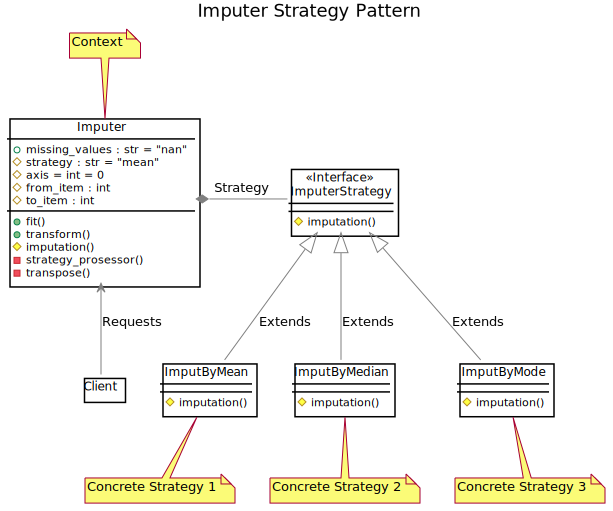

In [24]:
diagram = """
@startuml

skinparam class {
    BackgroundColor White
    ArrowColor Gray
    BorderColor Black
}
skinparam stereotypeCBackgroundColor Gray
hide circle

title Imputer Strategy Pattern

class Client
hide Client methods
hide Client attributes

class Imputer
Imputer : +fit()
Imputer : +transform()
Imputer : #imputation()
Imputer : -strategy_prosessor()
Imputer : -transpose()
Imputer : +missing_values : str = "nan"
Imputer : #strategy : str = "mean"
Imputer : #axis = int = 0
Imputer : #from_item : int
Imputer : #to_item : int
note Top: Context

class ImputerStrategy <<Interface>>
ImputerStrategy : #imputation()

class ImputByMean
ImputByMean : #imputation()
note Bottom: Concrete Strategy 1

class ImputByMedian
ImputByMedian : #imputation()
note Bottom: Concrete Strategy 2

class ImputByMode
ImputByMode : #imputation()
note Bottom: Concrete Strategy 3

Imputer <-- Client : Requests
Imputer *- ImputerStrategy : Strategy
ImputerStrategy <|-- ImputByMean : Extends
ImputerStrategy <|-- ImputByMedian : Extends
ImputerStrategy <|-- ImputByMode : Extends

@enduml
"""

from IPython.display import SVG
SVG(render_uml(diagram))

Exporting to png file format.

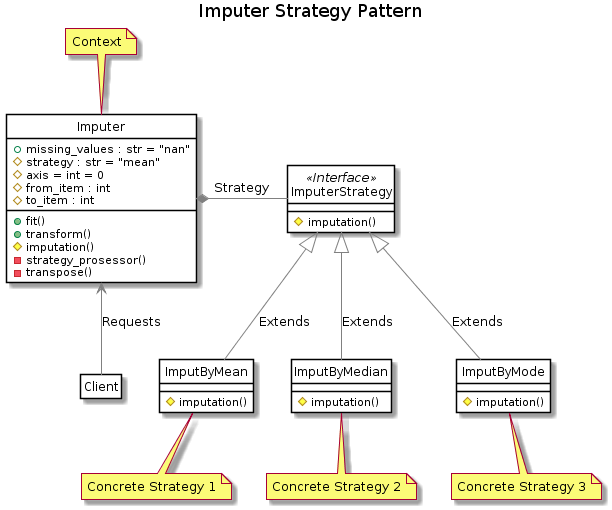

In [25]:
from IPython.display import Image
Image(render_uml(diagram, "png"))